# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, make_scorer
sns.set(style='whitegrid')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [50]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [51]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

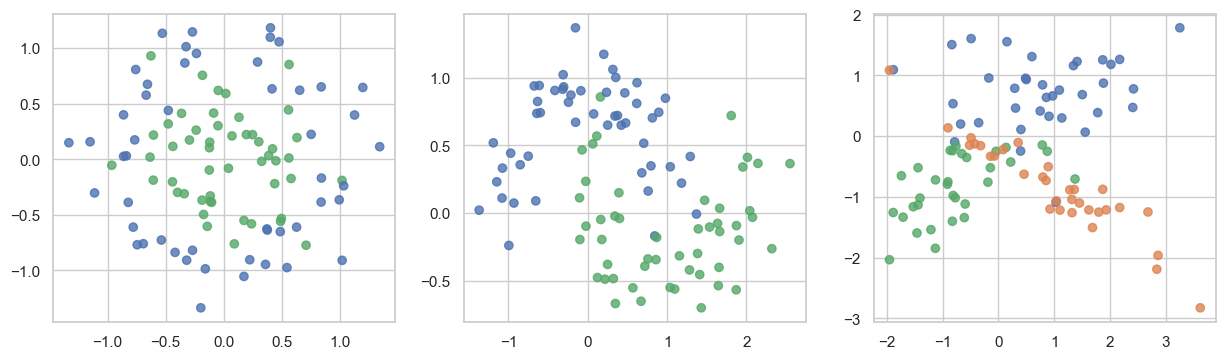

In [52]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [53]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

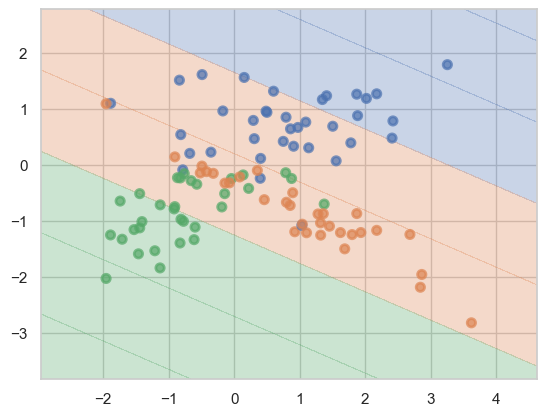

In [54]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

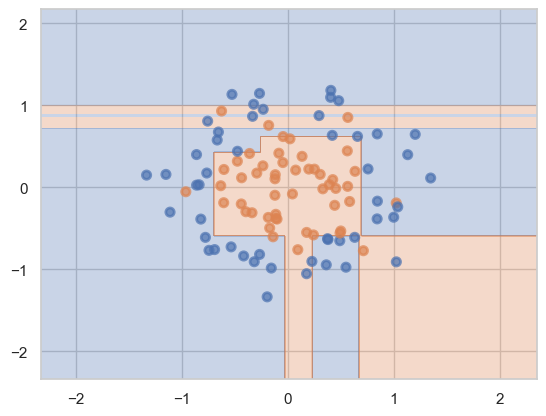

Accurcay_test равен 0.7333333333333333
Accurecy_train равен 1.0


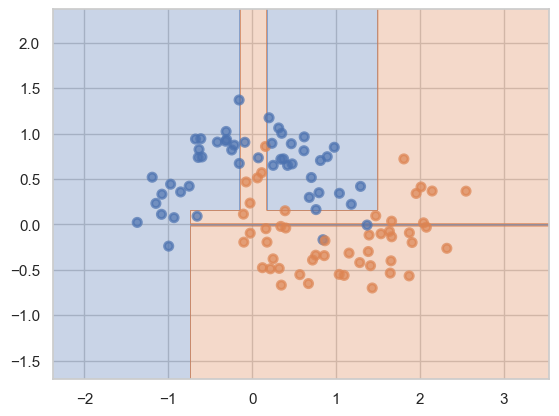

Accurcay_test равен 0.8666666666666667
Accurecy_train равен 1.0


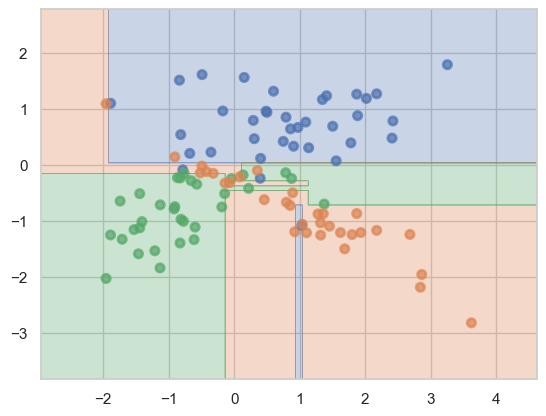

Accurcay_test равен 0.8333333333333334
Accurecy_train равен 1.0


In [55]:
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    dec_tree = DecisionTreeClassifier()
    dec_tree.fit(X_train, y_train)
    y_pred = dec_tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    plot_surface(dec_tree, X, y)
    plt.show()
    print(f'Accurcay_test равен {accuracy}')
    print(f'Accurecy_train равен {accuracy_score(y_train, dec_tree.predict(X_train))}')

__Ответ:__ Да, деревья переобучились относительно сильно. Можно заметить, что accuracy на тесте падает в среднем на 0,2, в то время как на трейне accuracy = 1, что является явным признаком переобучения. По графикам также заметно, что чем сложнее распределение, тем больше дерево пытается подстроиться под обучающие объекты и выдает "неестественные" области.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

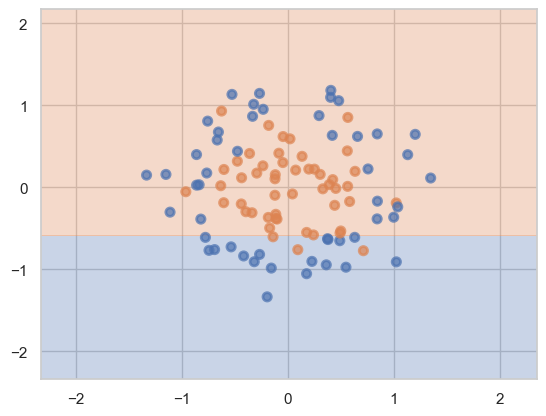

max_depth: 1, min_samples_leaf: 1
Accurcay-test равен 0.4666666666666667
Accurcay-train равен 0.7285714285714285
Датасет 1


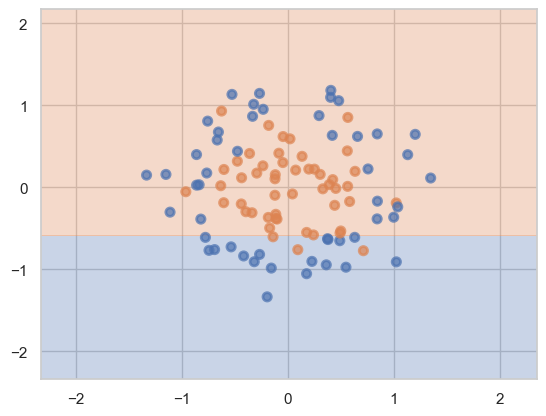

max_depth: 1, min_samples_leaf: 6
Accurcay-test равен 0.4666666666666667
Accurcay-train равен 0.7285714285714285
Датасет 1


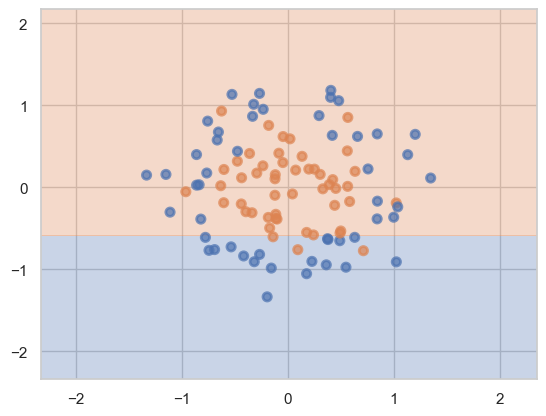

max_depth: 1, min_samples_leaf: 11
Accurcay-test равен 0.4666666666666667
Accurcay-train равен 0.7285714285714285
Датасет 1


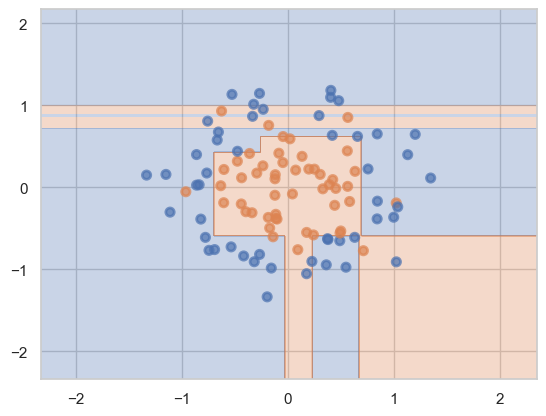

max_depth: 6, min_samples_leaf: 1
Accurcay-test равен 0.7333333333333333
Accurcay-train равен 1.0
Датасет 1


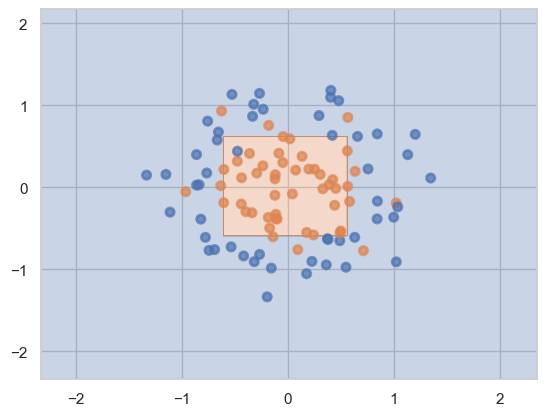

max_depth: 6, min_samples_leaf: 6
Accurcay-test равен 0.9
Accurcay-train равен 0.8428571428571429
Датасет 1


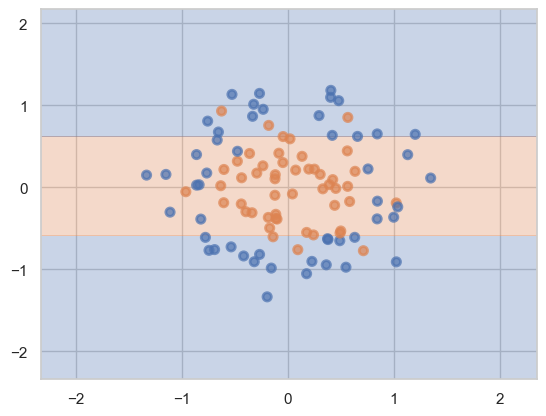

max_depth: 6, min_samples_leaf: 11
Accurcay-test равен 0.6666666666666666
Accurcay-train равен 0.8142857142857143
Датасет 1


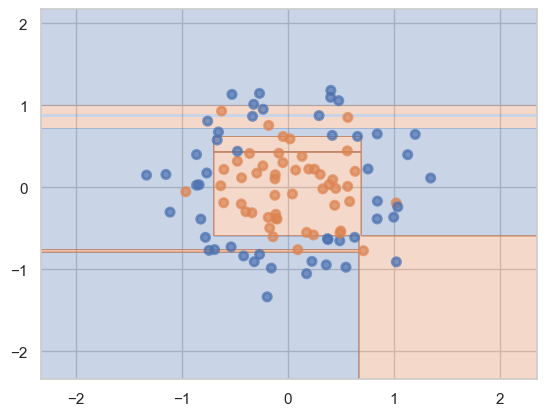

max_depth: 11, min_samples_leaf: 1
Accurcay-test равен 0.7333333333333333
Accurcay-train равен 1.0
Датасет 1


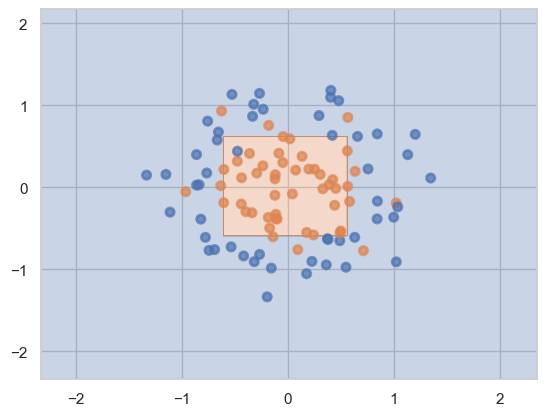

max_depth: 11, min_samples_leaf: 6
Accurcay-test равен 0.9
Accurcay-train равен 0.8428571428571429
Датасет 1


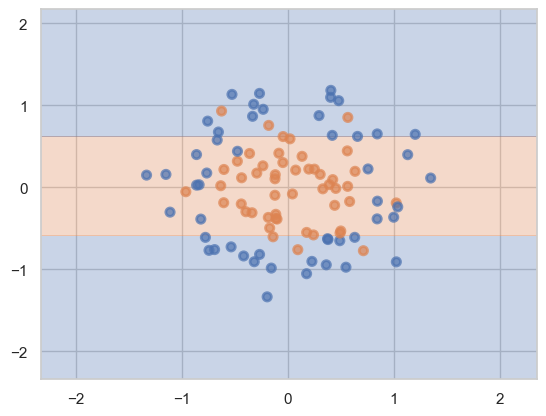

max_depth: 11, min_samples_leaf: 11
Accurcay-test равен 0.6666666666666666
Accurcay-train равен 0.8142857142857143
Датасет 1


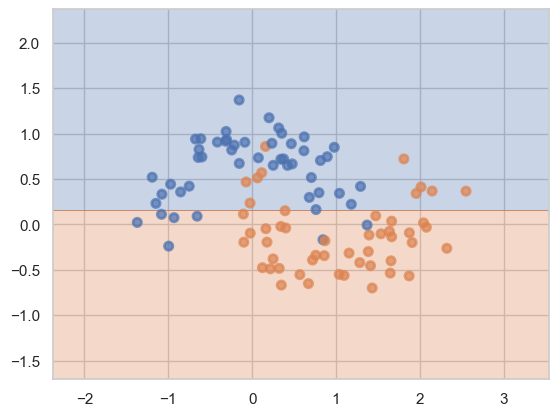

max_depth: 1, min_samples_leaf: 1
Accurcay-test равен 0.8
Accurcay-train равен 0.8428571428571429
Датасет 2


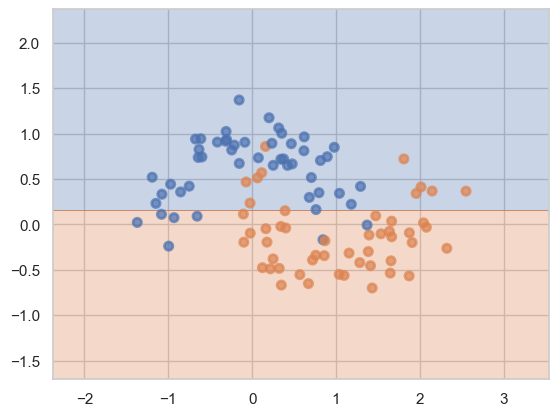

max_depth: 1, min_samples_leaf: 6
Accurcay-test равен 0.8
Accurcay-train равен 0.8428571428571429
Датасет 2


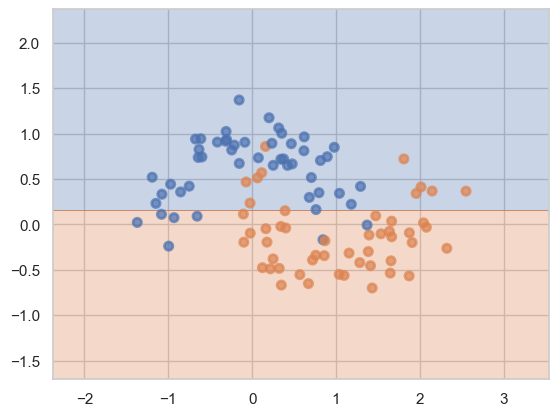

max_depth: 1, min_samples_leaf: 11
Accurcay-test равен 0.8
Accurcay-train равен 0.8428571428571429
Датасет 2


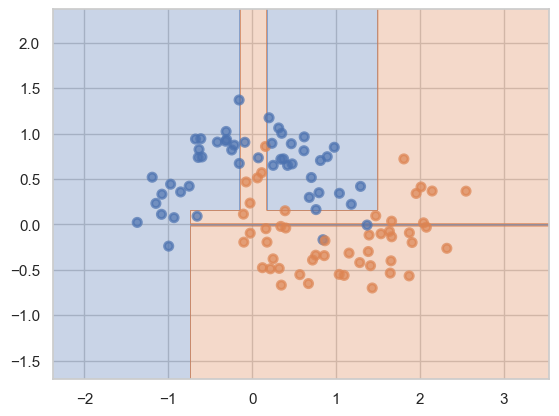

max_depth: 6, min_samples_leaf: 1
Accurcay-test равен 0.8666666666666667
Accurcay-train равен 1.0
Датасет 2


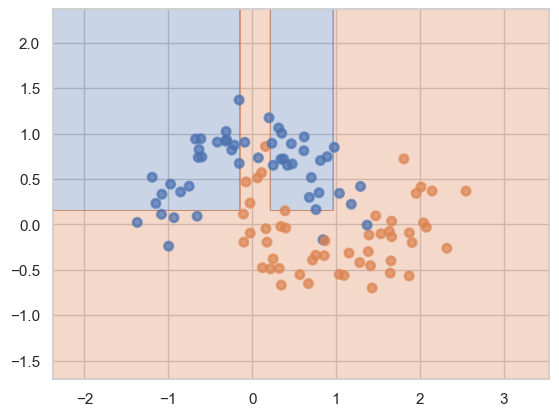

max_depth: 6, min_samples_leaf: 6
Accurcay-test равен 0.7
Accurcay-train равен 0.9285714285714286
Датасет 2


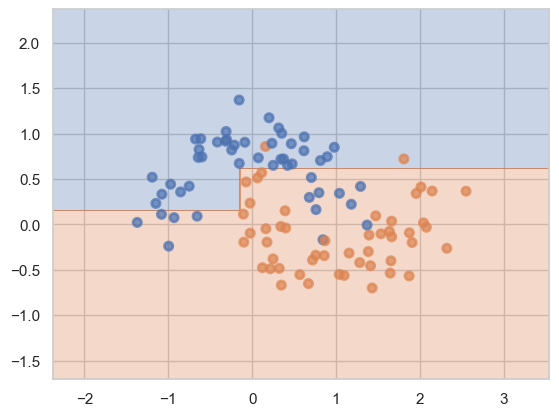

max_depth: 6, min_samples_leaf: 11
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8714285714285714
Датасет 2


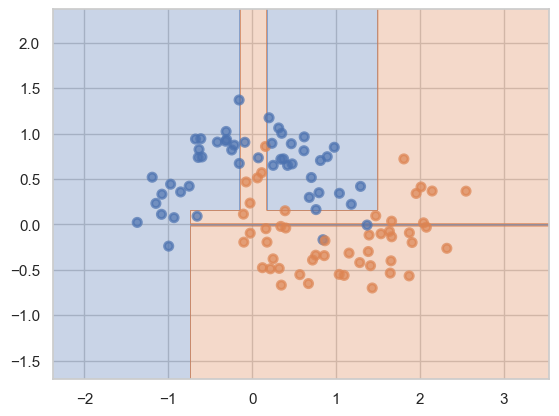

max_depth: 11, min_samples_leaf: 1
Accurcay-test равен 0.8666666666666667
Accurcay-train равен 1.0
Датасет 2


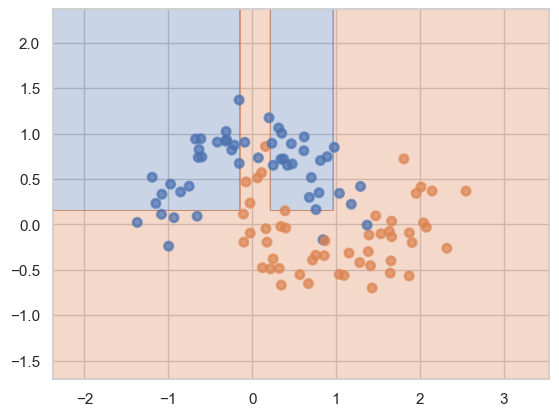

max_depth: 11, min_samples_leaf: 6
Accurcay-test равен 0.7
Accurcay-train равен 0.9285714285714286
Датасет 2


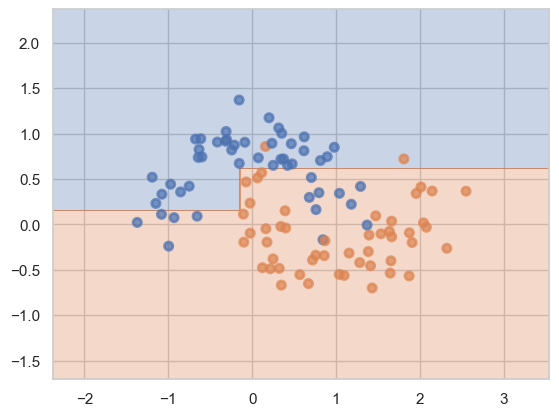

max_depth: 11, min_samples_leaf: 11
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8714285714285714
Датасет 2


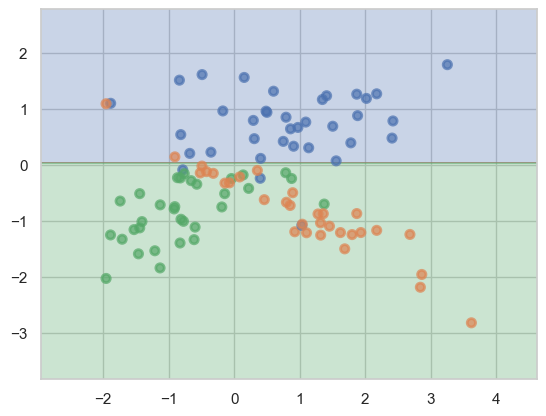

max_depth: 1, min_samples_leaf: 1
Accurcay-test равен 0.6
Accurcay-train равен 0.6714285714285714
Датасет 3


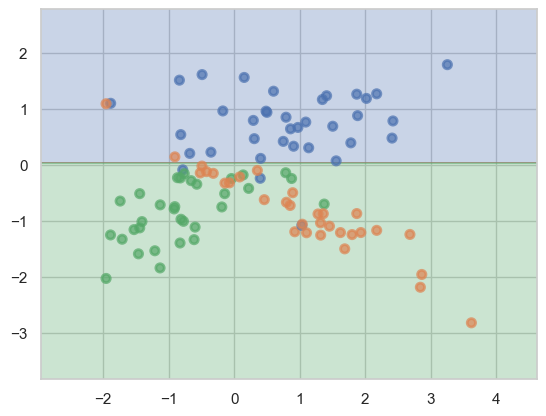

max_depth: 1, min_samples_leaf: 6
Accurcay-test равен 0.6
Accurcay-train равен 0.6714285714285714
Датасет 3


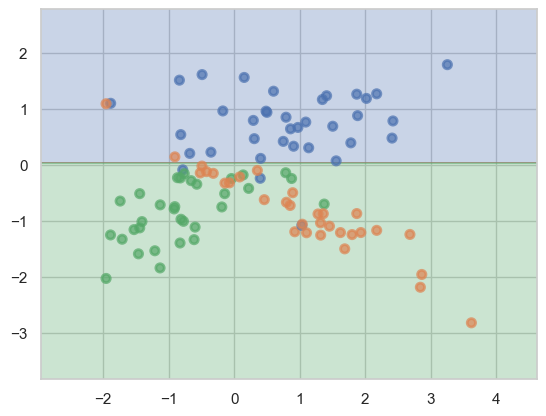

max_depth: 1, min_samples_leaf: 11
Accurcay-test равен 0.6
Accurcay-train равен 0.6714285714285714
Датасет 3


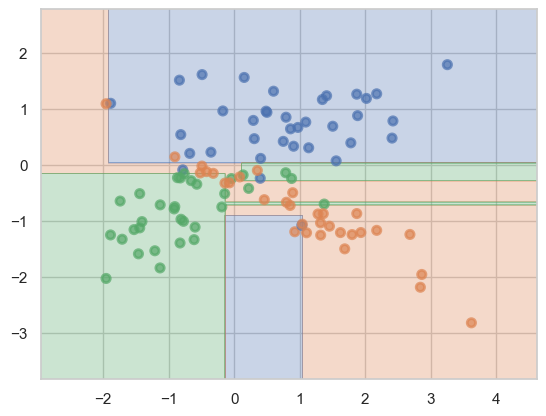

max_depth: 6, min_samples_leaf: 1
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.9857142857142858
Датасет 3


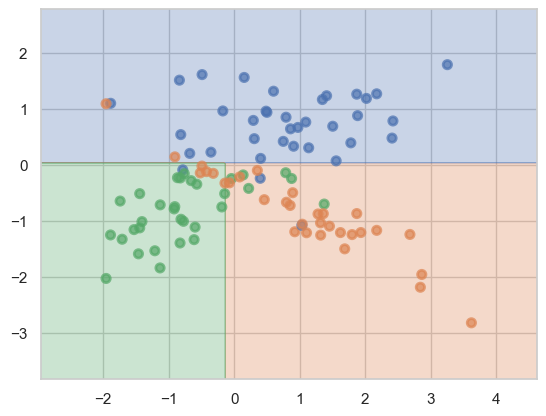

max_depth: 6, min_samples_leaf: 6
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8857142857142857
Датасет 3


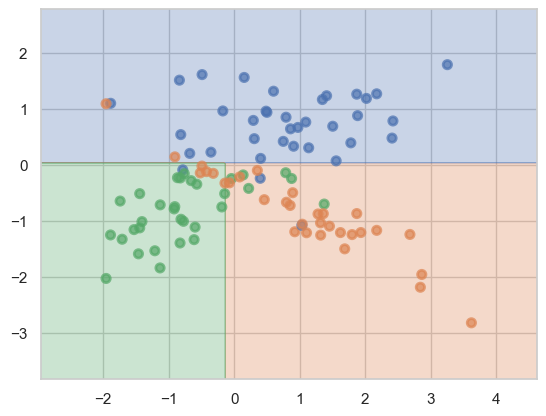

max_depth: 6, min_samples_leaf: 11
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8857142857142857
Датасет 3


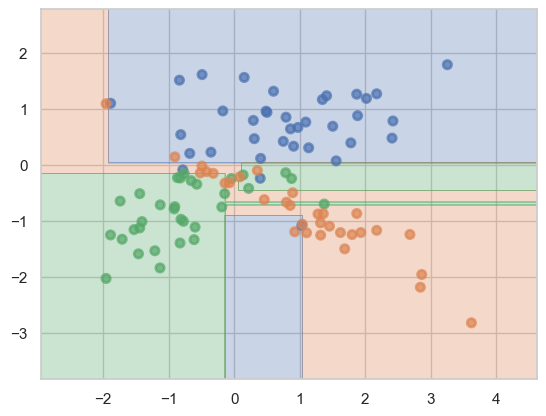

max_depth: 11, min_samples_leaf: 1
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 1.0
Датасет 3


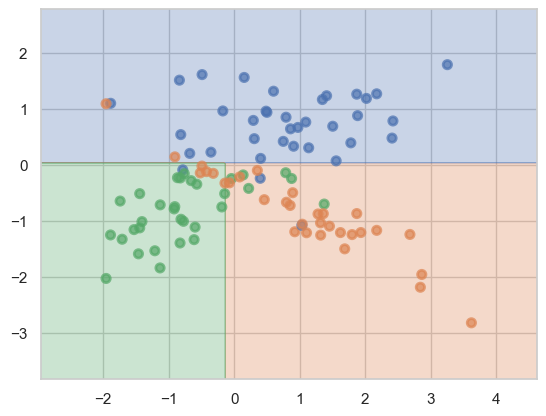

max_depth: 11, min_samples_leaf: 6
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8857142857142857
Датасет 3


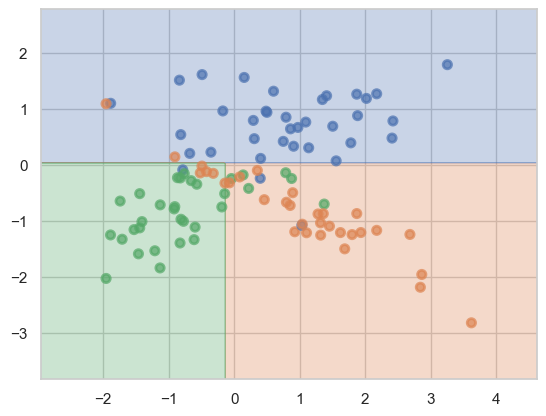

max_depth: 11, min_samples_leaf: 11
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8857142857142857
Датасет 3


In [56]:
counter = 1
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for i in range(1, 16, 5):
        for j in range(1, 16, 5):
            dec_tree = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
            dec_tree.fit(X_train, y_train)
            y_pred_test = dec_tree.predict(X_test)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            y_pred_train = dec_tree.predict(X_train)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            plot_surface(dec_tree, X, y)
            plt.show()
            print(f'max_depth: {i}, min_samples_leaf: {j}')
            print(f'Accurcay-test равен {accuracy_test}')
            print(f'Accurcay-train равен {accuracy_train}')
            print(f'Датасет {counter}')
    counter+=1

__Ответ:__ Для датасетов с двумя классами можно отметить следующую тенденцию - наилучшие реузльтаты получаются тогда, когда параметры max_depth и min_samples_leaf достаточно большие. Если глубина дерева маленькая, то модель недостаточно обучается и показывает плохие результаты и на трейне и на тесте, если глубина больше, а min_samples_leaf относительно маленькое - то происходит переобучение. Модель обладает хорошей обобщающей способностью только, когда оба этих параметра достаточно (относительно большие). При этом глубина требуется тем больше, чем больше классов в модели - поэтому оптимальное max_depth на данных с тремя классами выше. Однако тенденция отношения двух параметров сохраняется та же.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [57]:
#мой код (который абсолютно правильный и логичный, но почему-то не проходит контест)
feature_vector = np.array([1, 3, 4, 5, 5, 5, 7])
target_vector = np.array([1, 1, 0, 1, 0, 1, 1])


sorted_indices = np.argsort(feature_vector)
feature_vector, target_vector = feature_vector[sorted_indices], target_vector[sorted_indices]


thresholds = (np.unique(feature_vector[1:]) + np.unique(feature_vector[:-1])) / 2

left_indicators = feature_vector < thresholds[:, np.newaxis]
right_indicators = feature_vector >= thresholds[:, np.newaxis]

left_part = left_indicators * target_vector
right_part = right_indicators * target_vector
p_plus_left = left_part.sum(axis=1) / left_indicators.sum(axis=1)
p_plus_right = right_part.sum(axis=1) / right_indicators.sum(axis=1)

h_l = 1 - p_plus_left**2 - (1 - p_plus_left)**2
h_r = 1 - p_plus_right**2 - (1 - p_plus_right)**2

ginis = -left_indicators.sum(axis=1) / len(feature_vector) * h_l - right_indicators.sum(axis=1) / len(feature_vector) * h_r

index_best = np.argmax(ginis)
threshold_best = thresholds[index_best]
gini_best = ginis[index_best]

In [58]:
thresholds

array([2. , 3.5, 4.5, 6. ])

In [59]:
ginis

array([-0.38095238, -0.34285714, -0.4047619 , -0.38095238])

In [60]:
gini_best

-0.34285714285714286

In [61]:
threshold_best

3.5

In [62]:
# код, сгенерированный GPT в ответ на просьбу оптимизировать мой код, немного доработанный
sorted_indices = np.argsort(feature_vector)
feature_vector_sorted = feature_vector[sorted_indices]
target_vector_sorted = target_vector[sorted_indices]

thresholds = (np.unique(feature_vector_sorted[1:]) + np.unique(feature_vector_sorted[:-1])) / 2

cumsum_left = np.cumsum(target_vector_sorted)
cumsum_right = np.cumsum(target_vector_sorted[::-1])[::-1]

left_counts = cumsum_left[:-1]
right_counts = cumsum_right[1:]

total_left_counts = np.arange(1, len(feature_vector_sorted))
total_right_counts = len(feature_vector_sorted) - total_left_counts

p_left = left_counts / total_left_counts
p_right = right_counts / total_right_counts

h_l = 1 - p_left**2 - (1 - p_left)**2
h_r = 1 - p_right**2 - (1 - p_right)**2
ginis = -(total_left_counts / len(feature_vector_sorted)) * h_l - (total_right_counts / len(feature_vector_sorted)) * h_r
    
indexes = (np.cumsum(np.unique(feature_vector, return_counts = True)[1]) - 1)[:-1]
ginis = ginis[indexes]

index_best = np.argmax(ginis)
threshold_best = thresholds[index_best]
gini_best = ginis[index_best]

In [63]:
thresholds

array([2. , 3.5, 4.5, 6. ])

In [64]:
ginis

array([-0.38095238, -0.34285714, -0.4047619 , -0.38095238])

In [65]:
gini_best

-0.34285714285714286

In [66]:
threshold_best

3.5

In [67]:
# Промт:
# feature_vector = np.array([1, 2, 3, 5, 5, 5, 7])
# target_vector = np.array([1, 0, 0, 1, 0, 1, 1])


# sorted_indices = np.argsort(feature_vector)
# feature_vector, target_vector = feature_vector[sorted_indices], target_vector[sorted_indices]


# thresholds = (np.unique(feature_vector[1:]) + np.unique(feature_vector[:-1])) / 2

# left_indicators = feature_vector < thresholds[:, np.newaxis]
# right_indicators = feature_vector >= thresholds[:, np.newaxis]

# left_part = left_indicators * target_vector
# right_part = right_indicators * target_vector
# p_plus_left = left_part.sum(axis=1) / left_indicators.sum(axis=1)
# p_plus_right = right_part.sum(axis=1) / right_indicators.sum(axis=1)

# h_l = 1 - p_plus_left**2 - (1 - p_plus_left)**2
# h_r = 1 - p_plus_right**2 - (1 - p_plus_right)**2

# ginis = -left_indicators.sum(axis=1) / len(feature_vector) * h_l - right_indicators.sum(axis=1) / len(feature_vector) * h_r

# index_best = np.argmax(ginis)
# threshold_best = thresholds[index_best]
# gini_best = ginis[index_best]

# Оптимизируй код, чтобы он работал быстрее (можешь использовать np.cumsum)

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [68]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


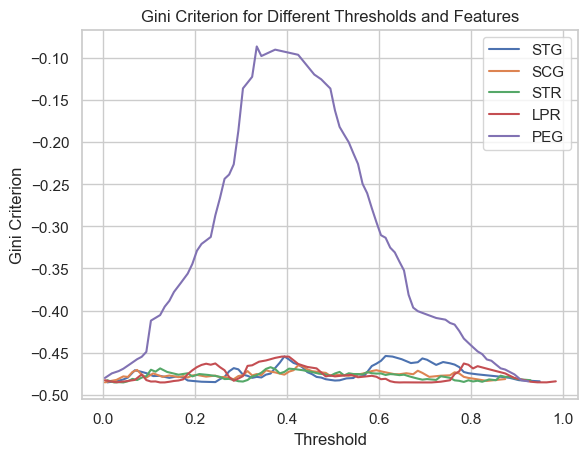

In [69]:
from hw5code import find_best_split
for feature in df.columns[:-1]:
    feature_vector = df[feature].values
    target_vector = df["UNS"].values
    thresholds, ginis, _, _ = find_best_split(feature_vector, target_vector)
    plt.plot(thresholds, ginis, label=feature)

plt.xlabel("Threshold")
plt.ylabel("Gini Criterion")
plt.title("Gini Criterion for Different Thresholds and Features")
plt.legend()
plt.show()
#данный код сгенерирован с помощью Chat GPT -  я передал ему код функции для поиска порогов и условие задания

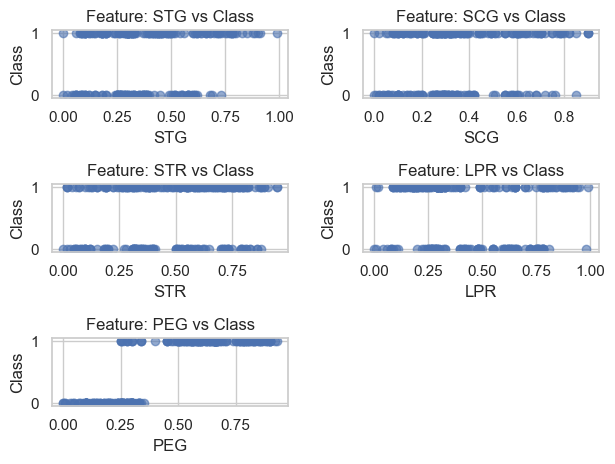

In [70]:
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 2, i)
    plt.scatter(df[feature], df["UNS"], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel("Class")
    plt.title(f"Feature: {feature} vs Class")

plt.tight_layout()
plt.show()
#данный код сгенерирован с помощью Chat GPT -  я передал ему код функции для поиска порогов и условие задания

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** 
* Исходя из кривых значений критерия Джинни первоначально необходимо производить деления по признаку ```PEG``` (мы максимизируем критерий, и именно этот признак показывает максимальное значений критерия в в своем максимуме)
* Этот результат согласуется с оценкой scatter-графиков, так как там тоже видно, что можно провести условную линию, разделяющую классы по параметру ```PEG```
* У *хороших* признаков сразу видно, что есть определенная граница, по которой можно разделить признаки на два подкласса
* У *плохих* признаков такую черту провести крайне трудно. Они одинаково представлены при рассмотрении любой границы. Пример такого признака - ```SCG```

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [71]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv('agaricus-lepiota.data', delimiter=',')
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [72]:
from hw5code import DecisionTree
y = df['p']
X = df.drop(['p'], axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
feature_types = ['real'] * X_train.shape[1]
model = DecisionTree(feature_types)
model.fit(X_train.to_numpy(), y_train.to_numpy())
predictions = model.predict(X_test.to_numpy())
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

Accuracy: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

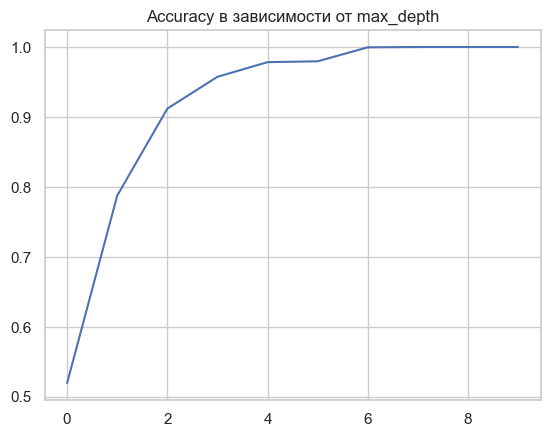

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
accuracies = []
for k in range(0, 10):
    feature_types = ['real'] * X_train.shape[1]
    model = DecisionTree(feature_types, max_depth=k)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    predictions = model.predict(X_test.to_numpy())
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
plt.title('Accuracy в зависимости от max_depth')
plt.plot(accuracies)
plt.show()

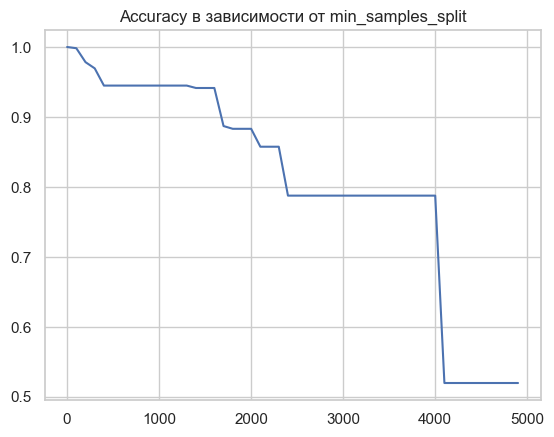

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
accuracies = []
for k in range(0, 5000, 100):
    feature_types = ['real'] * X_train.shape[1]
    model = DecisionTree(feature_types, min_samples_split=k)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    predictions = model.predict(X_test.to_numpy())
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
plt.title('Accuracy в зависимости от min_samples_split')
plt.plot(list(range(0, 5000, 100)), accuracies)
plt.show()

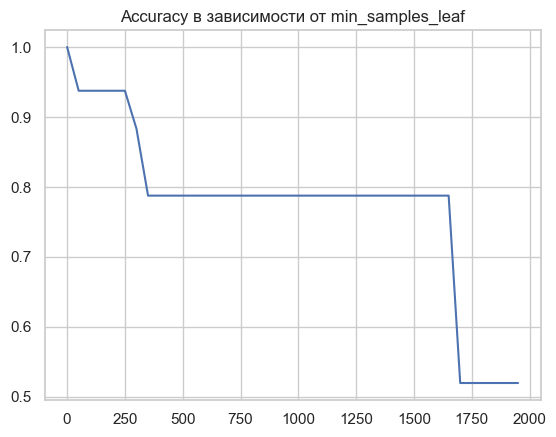

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
accuracies = []
for k in range(0, 2000, 50):
    feature_types = ['real'] * X_train.shape[1]
    model = DecisionTree(feature_types, min_samples_leaf=k)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    predictions = model.predict(X_test.to_numpy())
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
plt.title('Accuracy в зависимости от min_samples_leaf')
plt.plot(list(range(0, 2000, 50)), accuracies)
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [77]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data_1 = df.copy()
data_2 = pd.read_csv('tic-tac-toe-endgame.csv')
data_3 = pd.read_csv('car.data')
data_4 = pd.read_csv('nursery.data')

In [78]:
data_2['V10'] = data_2['V10'].apply(lambda x: 1 if x == 'positive' else 0)
data_3['unacc'] = data_3['unacc'].apply(lambda x: 0 if (x == 'unacc') | (x == 'acc') else 1)
data_4['recommend'] = data_4['recommend'].apply(lambda x: 0 if (x == 'not_recom') | (x == 'recommend') else 1)

In [79]:
target = {'data_1':'p', 'data_2':'V10', 'data_3':'unacc', 'data_4':'recommend'}
res = {}
# res = {'data_1':[], 'data_2':[], 'data_3':[], 'data_4':[]}
for k in ['data_1', 'data_2', 'data_3', 'data_4']:
    if k == 'data_1':
        df = data_1.copy()
    elif k == 'data_2':
        df = data_2.copy()
    elif k == 'data_3':
        df = data_3.copy()
    else:
        df = data_4.copy()

    tar = target[k]
    
    y = df[tar]
    X = df.drop(tar, axis=1)
    
    le = LabelEncoder()
    
    for col in X.columns:
        if X[col].dtype == 'object':
            print(k, 'Применяем енкодинг')
            X[col] = le.fit_transform(X[col])
        
        
    feature_types = ['real'] * X.shape[1]
    model_1 = DecisionTree(feature_types)
    accuracy_1 = np.mean(cross_val_score(model_1, X.to_numpy(), y.to_numpy(), scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle=True, random_state=555)))
    
    feature_types = np.array(['categorical'] * X.shape[1])
    model_2 = DecisionTree(feature_types)
    accuracy_2 = np.mean(cross_val_score(model_2, X.to_numpy(), y.to_numpy(), scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle=True, random_state=555)))
    
    ohe = OneHotEncoder(sparse=False)
    X_ohe = ohe.fit_transform(X)
    columns_ohe = ohe.get_feature_names_out(X.columns)
    X_ohe_df = pd.DataFrame(X_ohe, columns=columns_ohe)
    feature_types = np.array(['real'] * X_ohe_df.shape[1])
    model_3 = DecisionTree(feature_types)
    accuracy_3 = np.mean(cross_val_score(model_3, X_ohe_df.to_numpy(), y.to_numpy(), scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle=True, random_state=555)))
    
    model_4 = DecisionTreeClassifier()
    accuracy_4 = np.mean(cross_val_score(model_4, X.to_numpy(), y.to_numpy(), scoring=make_scorer(accuracy_score), cv = StratifiedKFold(10, shuffle=True, random_state=555)))
    
    res[k] = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]

data_2 Применяем енкодинг
data_2 Применяем енкодинг
data_2 Применяем енкодинг
data_2 Применяем енкодинг
data_2 Применяем енкодинг
data_2 Применяем енкодинг
data_2 Применяем енкодинг
data_2 Применяем енкодинг
data_2 Применяем енкодинг
data_3 Применяем енкодинг
data_3 Применяем енкодинг
data_3 Применяем енкодинг
data_3 Применяем енкодинг
data_3 Применяем енкодинг
data_3 Применяем енкодинг
data_4 Применяем енкодинг
data_4 Применяем енкодинг
data_4 Применяем енкодинг
data_4 Применяем енкодинг
data_4 Применяем енкодинг
data_4 Применяем енкодинг
data_4 Применяем енкодинг
data_4 Применяем енкодинг


In [80]:
df_results = pd.DataFrame(res, index=[
    "DecisionTree (все вещественные)",
    "DecisionTree (все категориальные)",
    "DecisionTree + OHE",
    "DecisionTreeClassifier (sklearn)"
])

df_results.T

,DecisionTree (все вещественные),DecisionTree (все категориальные),DecisionTree + OHE,DecisionTreeClassifier (sklearn)
data_1,1.000000,1.000000,1.000000,1.000000
data_2,0.888289,0.939441,0.938399,0.889353
data_3,0.991891,0.991891,0.990160,0.991309
data_4,0.999768,0.999691,0.999691,0.999768


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** В случае с первым датасетом все алгоритмы показали максимальный accuracy, равный 1. Это может говорить о том, что набор данных достаточно легок для предсказывания для всех алгоритмов. На втором наборе данных можно, во-первых, отметить то, что DT и DTC показывает рызные результаты на одинаковом наборе данных (первый и последний алгоритм). Это связано с тем, что DTC после каждого разветвления перемешивает объекты, а затем, если несколько разделений одинаково улучшают критерий, выбирает рандомное разделение. Для того, чтобы контролировать такое разбиение, DTC принимает праметр ```random_state```. Собственно-реализованный класс DT во всех подобных случаях действует одинаково - выбирает минимальный порог. Во-вторых, DecisionTree (все категориальные) показал слегка лучший ```accuracy```, чем DecisionTree + OHE. Разница заключается в том, что в первом случае мы перекладываем отвественность за *обработку* категориальных признаков на дерево решений, а во втором - мы самостоятельно обрабатываем признаки и даем их дереву решений в обработку как обычные числовые. Очевидно, первый подход работает лучше, так как дереву решений в таком случае легче найти нелинейные признаки и построить более правильную модель. Преимущество первого первого подхода над вторым отмечается также и на результатах работы алгоритмов над последующим датасетом. В 4 же датасете до обработки c помощью *LabelEncoding* столбцы ```recommended``` и ```recommend```, который мы преобразовываем в бинарные классы для предсказания, практически идентичны. Поэтому единственной (почти,но главной точно) нужной колонкой для предсказания классов становится колонка ```recommended```. Представим, что *LabelEncoding* закодировал значения в колонке ```recommende``` не по рандомну, а по логичному порядку, где *not_recom* - это ноль и далее по возрастанию степени рекомендованности. Тогда задача в целом сводится практически к линейной, однако мы не можем гарантировать, что *LabelEncoding* закодирует эти категории так как нам надо, тогда у нас получатся нелинейные признаки, которое дерево решений найдет и сделает из них линейную модель. Логично, что с этой задаче эффективнее всего справится стандартное рассмотрение признаков, как числовых. Рассмотрение их как категориальных может вызывать неэффективность, так как они по сути таковыми не являются (ведь у каждую категорию мы можем сравнить между собой по степени рекоммендованности), поэтому методы, обрабтывающие категориальные переменные дают чуть менее хороший результат. Кроме того, так как стобец лишь один, по-видимому OHE + DT сводится к просто категориальному распознованию признаков.


Для того, чтобы решить проблему неопределенности, можно рассмотреть два метода - один простой, но но быстрый, второй - сложный, но долгий: 


* Первый сводится к тому, чтобы просто брать минимальный порог
* Второй сводится к тому, чтобы, каждый раз, когда возникает ситуация с одинаковыми порогами, создавать $ N $ копий деревьев, где $ N - число порогов, приводящих к одинаковому улучшению $. В конце считать *accuracy* всех копий и строить итоговое дерево, выбирая список порогов, давших лучший результат

Вставьте что угодно, описывающее ваши впечатления от этого задания:

![image](https://i.ytimg.com/vi/Ns8e1VYQRFk/maxresdefault.jpg)

In [81]:
unique_counts = {}
for col in data_4.columns:
    if col != 'recommend':
        unique_counts[col] = data_4.groupby(col)['recommend'].nunique()

for col, counts in unique_counts.items():
    print(f"Колонка: {col}")
    print(counts)
    print()  

Колонка: usual
usual
great_pret     2
pretentious    2
usual          2
Name: recommend, dtype: int64

Колонка: proper
proper
critical       2
improper       2
less_proper    2
proper         2
very_crit      2
Name: recommend, dtype: int64

Колонка: complete
complete
complete      2
completed     2
foster        2
incomplete    2
Name: recommend, dtype: int64

Колонка: 1
1
1       2
2       2
3       2
more    2
Name: recommend, dtype: int64

Колонка: convenient
convenient
convenient    2
critical      2
less_conv     2
Name: recommend, dtype: int64

Колонка: convenient.1
convenient.1
convenient    2
inconv        2
Name: recommend, dtype: int64

Колонка: nonprob
nonprob
nonprob          2
problematic      2
slightly_prob    2
Name: recommend, dtype: int64

Колонка: recommended
recommended
not_recom      1
priority       1
recommended    2
Name: recommend, dtype: int64



In [82]:
unique_counts = {}
for col in data_2.columns:
    if col != 'V10':
        unique_counts[col] = data_2.groupby(col)['V10'].nunique()

for col, counts in unique_counts.items():
    print(f"Колонка: {col}")
    print(counts)
    print()  

Колонка: V1
V1
b    2
o    2
x    2
Name: V10, dtype: int64

Колонка: V2
V2
b    2
o    2
x    2
Name: V10, dtype: int64

Колонка: V3
V3
b    2
o    2
x    2
Name: V10, dtype: int64

Колонка: V4
V4
b    2
o    2
x    2
Name: V10, dtype: int64

Колонка: V5
V5
b    2
o    2
x    2
Name: V10, dtype: int64

Колонка: V6
V6
b    2
o    2
x    2
Name: V10, dtype: int64

Колонка: V7
V7
b    2
o    2
x    2
Name: V10, dtype: int64

Колонка: V8
V8
b    2
o    2
x    2
Name: V10, dtype: int64

Колонка: V9
V9
b    2
o    2
x    2
Name: V10, dtype: int64



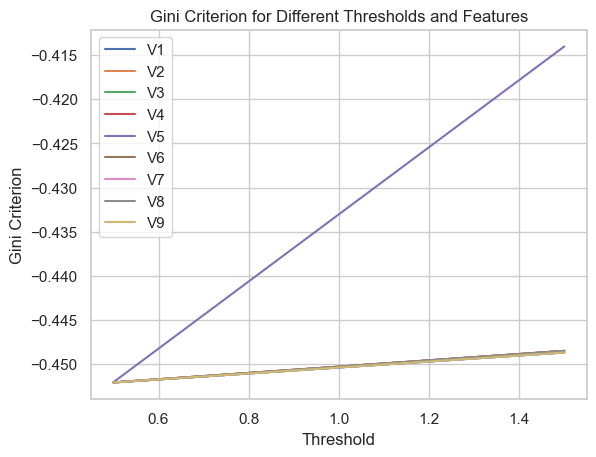

In [83]:
for feature in data_2.columns[:-1]:
    feature_vector = data_2[feature].values
    feature_vector = le.fit_transform(feature_vector)
    target_vector = data_2["V10"].values
    thresholds, ginis, _, _ = find_best_split(feature_vector, target_vector)
    plt.plot(thresholds, ginis, label=feature)

plt.xlabel("Threshold")
plt.ylabel("Gini Criterion")
plt.title("Gini Criterion for Different Thresholds and Features")
plt.legend()
plt.show()

In [84]:
data_3

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,0
1,vhigh,vhigh,2,2,small,high,0
2,vhigh,vhigh,2,2,med,low,0
3,vhigh,vhigh,2,2,med,med,0
4,vhigh,vhigh,2,2,med,high,0
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,1
1723,low,low,5more,more,med,high,1
1724,low,low,5more,more,big,low,0
1725,low,low,5more,more,big,med,1


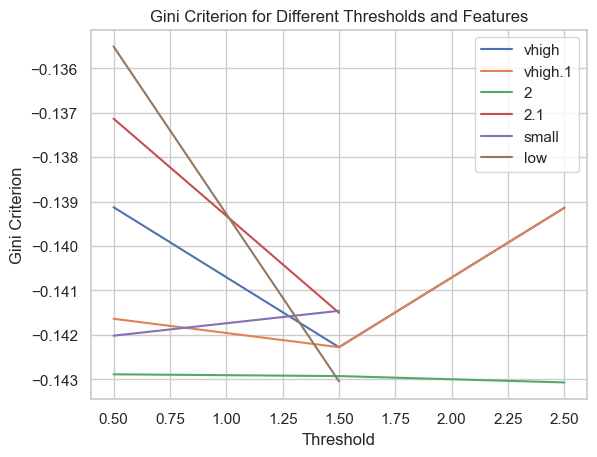

In [85]:
for feature in data_3.columns[:-1]:
    feature_vector = data_3[feature].values
    feature_vector = le.fit_transform(feature_vector)
    target_vector = data_3["unacc"].values
    thresholds, ginis, _, _ = find_best_split(feature_vector, target_vector)
    plt.plot(thresholds, ginis, label=feature)

plt.xlabel("Threshold")
plt.ylabel("Gini Criterion")
plt.title("Gini Criterion for Different Thresholds and Features")
plt.legend()
plt.show()

In [86]:
data_4

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,1
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,1
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,0
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,1
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,0
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,1
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,1


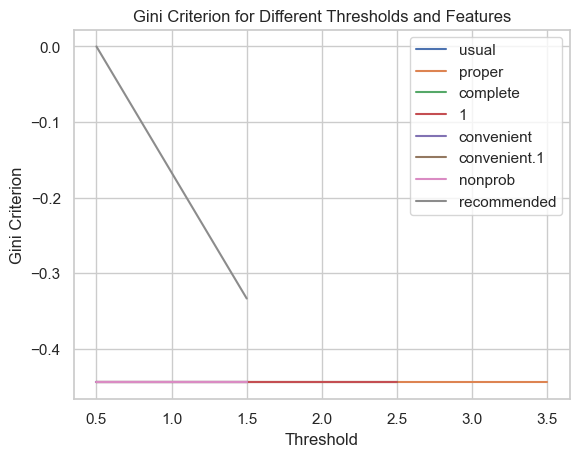

In [87]:
for feature in data_4.columns[:-1]:
    feature_vector = data_4[feature].values
    feature_vector = le.fit_transform(feature_vector)
    target_vector = data_4["recommend"].values
    thresholds, ginis, _, _ = find_best_split(feature_vector, target_vector)
    plt.plot(thresholds, ginis, label=feature)

plt.xlabel("Threshold")
plt.ylabel("Gini Criterion")
plt.title("Gini Criterion for Different Thresholds and Features")
plt.legend()
plt.show()